In [21]:
# Librerías

import matplotlib
from scipy import misc
from scipy import stats
from scipy import special
import pylab as plt
import numpy as np

%matplotlib inline

font = {'weight' : 'bold',
        'size'   : 16}

matplotlib.rc('font', **font)

In [22]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Pulse para codigo</button>''', raw=True)

Pulse para codigo

# ANÁLISIS ESTADÍSTICO DE DATOS: Distribuciones continuas - T Student

Material en construcción, no ha sido revisado por pares. Última revisión: febrero 2017, Edgar Rueda

### Referencias bibliográficas

García, F. J. G., López, N. C., & Calvo, J. Z. (2009). Estadística básica para estudiantes de ciencias.

Gutiérrez, J. C. Á. (2007). Estadística general aplicada. Universidad Eafit.

Lyons, L. (1991). A practical guide to data analysis for physical science students. Cambridge University Press.

____

## REPASO

## Conjunto de datos

Para esta sección haremos uso de dos conjuntos de datos, el primero se obtiene a partir de las medidas de un área, y el segundo corresponde a la intensidad de un patrón de speckle.

### Patrón de speckle

El promedio de intensidad es 52.1
La desviación estándar de la intensidad es 40.0


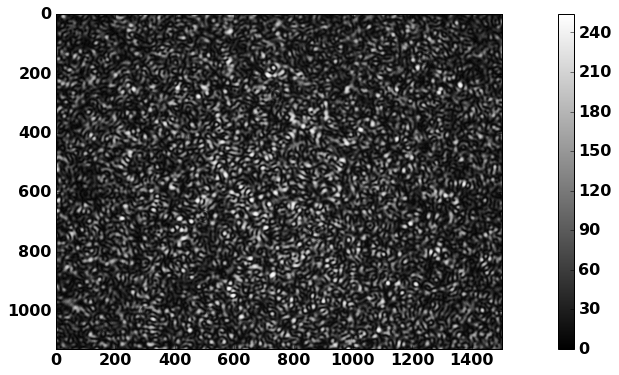

In [23]:
Ima = misc.imread('speckle.png')
Ima = Ima[:,:,0] # la imagen importada tenía 4 "canales" pero solo nos interesa uno
plt.rcParams['figure.figsize'] = 20, 6 # para modificar el tamaño de la figura
plt.figure(1)
plt.imshow(Ima, cmap='gray')
plt.colorbar()

mediaS = np.mean(Ima) # Comando directo de python
devstdS = np.std(Ima)
clasesS = int(np.sqrt(256))

histS, bins = np.histogram(Ima,bins=clasesS)

print('El promedio de intensidad es %.1f' % mediaS)
print('La desviación estándar de la intensidad es %.1f' %devstdS)

$\textbf{FIGURA 1.}$ Patrón de speckle. Los valores de intensidad están dados en una escala de 8 Bit(256 niveles).

### Medídas de longitud

In [24]:
lado = np.array([41.10 , 41.50 , 41.35 , 41.10 , 41.15 , 41.20 , 41.05 , 41.35 , 41.40 , 41.30 , 41.30 , 41.15 , 41.10
              , 41.45 , 41.35 , 41.30 , 41.20 , 41.20 , 41.10 , 41.30 , 41.00 , 41.35 , 41.35, 41.00 , 41.35 , 41.15
              , 41.50 , 41.40 , 41.25 , 41.30 , 41.35 , 41.40 , 41.40, 41.10 , 41.30 , 41.50 , 41.35 , 41.45 , 41.25
              , 41.30 , 41.20 , 41.35 , 41.45 , 41.50 , 41.55 
              , 41.40 , 41.25 , 41.65 , 41.30 , 41.35 , 41.20 , 41.50 , 41.45 , 41.40 , 41.45 , 41.45 , 41.40 
              , 41.40 , 41.45 , 41.40 , 41.45 , 41.40, 41.30 , 41.20 , 41.60 , 41.40])

y = np.zeros((lado.size))
for p in range(0,lado.size):
    y[p] = 2 + np.random.random()

El promedio de longitud es 41.3 mm
La desviación estándar de la longitud es 0.1 mm


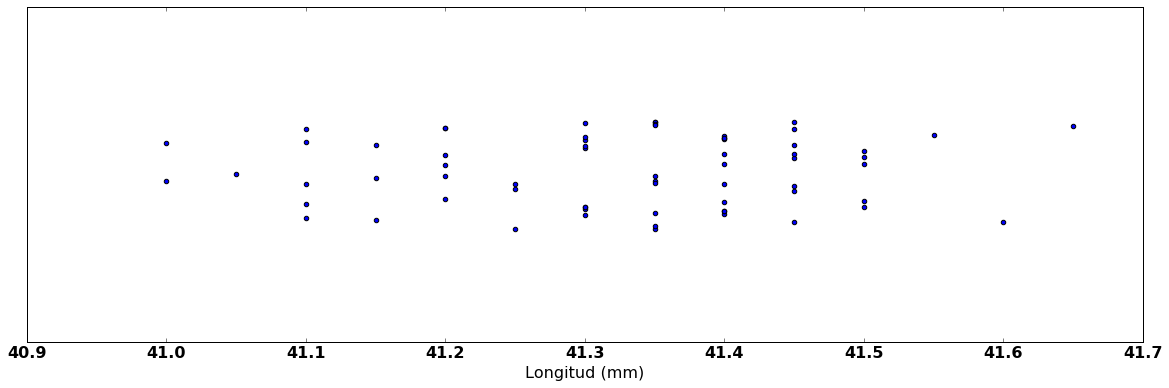

In [25]:
frame1 = plt.gca()
plt.rcParams['figure.figsize'] = 15, 6 # para modificar el tamaño de la figura
#frame1 = plt.figure(2)
plt.scatter(lado,y)
plt.ylim(1,4)
plt.xlabel('Longitud (mm)')
frame1.axes.get_yaxis().set_visible(False)

mediaL = np.mean(lado) # Comando directo de python
devstdL = np.std(lado)
clasesL = int(np.sqrt(lado.size))

histL, binsL = np.histogram(lado,bins=clasesL)

print('El promedio de longitud es %.1f mm' % mediaL)
print('La desviación estándar de la longitud es %.1f mm' %devstdL)

$\textbf{FIGURA 2.}$ Distribución de las medidas de longitud en una muestra.

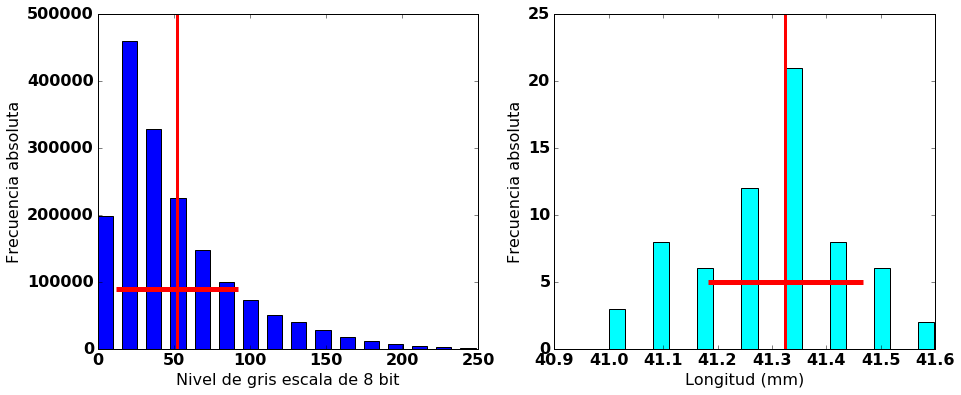

In [26]:
plt.figure(3)
plt.subplot(1,2,1)
plt.bar(bins[0:histS.size],histS,width=10)
plt.axvline(mediaS, linewidth=3, c="red")
plt.plot([mediaS-devstdS, mediaS+devstdS], [90000, 90000], linewidth=5, linestyle="-", color="red",
         solid_capstyle="butt")
plt.xlabel('Nivel de gris escala de 8 bit')
plt.ylabel('Frecuencia absoluta')

# Medidas de longitud
plt.subplot(1,2,2)
plt.bar(binsL[0:histL.size],histL,width=0.03,color='cyan')
plt.axvline(mediaL,linewidth=3, c="red")
plt.plot([mediaL-devstdL, mediaL+devstdL], [5, 5], linewidth=5, linestyle="-", color="red",
         solid_capstyle="butt")
plt.xlabel('Longitud (mm)')
plt.ylabel('Frecuencia absoluta')
plt.show()

$\textbf{FIGURA 3.}$ Histogramas (izquierda) intensidad patrón de speckle y (derecha) medidas de longitud de muestra. las barras rojas verticales y horizontales corresponden al promedio y desviación estándar respectivamente.

## Distribución normal o Gaussiana

Definición: Se dice que la variable aleatoria X sigue una distribución normal con parámetros $\mu$ y $\sigma$, denotada como $N(\mu,\sigma)$ cuando su función de densidad de probabilidad es:
$$f(x) = \frac{1}{\sqrt{(2\pi\sigma^2)}} \exp{\Big(\frac{-(x-\mu)^2}{2\sigma^2}\Big)} \ \ \forall x \in \mathbb{R}$$
con
$$-\infty \leq \mu \leq \infty \ , \ \sigma > 0$$

$\textbf{Importante:}$ en el caso de la distribución normal los parámetros $\mu$ y $\sigma$ se corresponden con la media aritmética y la desviación estándar, respectivamente. $\mu$ también es un eje de simetría por lo que la media, la mediana y la moda coinciden en el mismo punto.

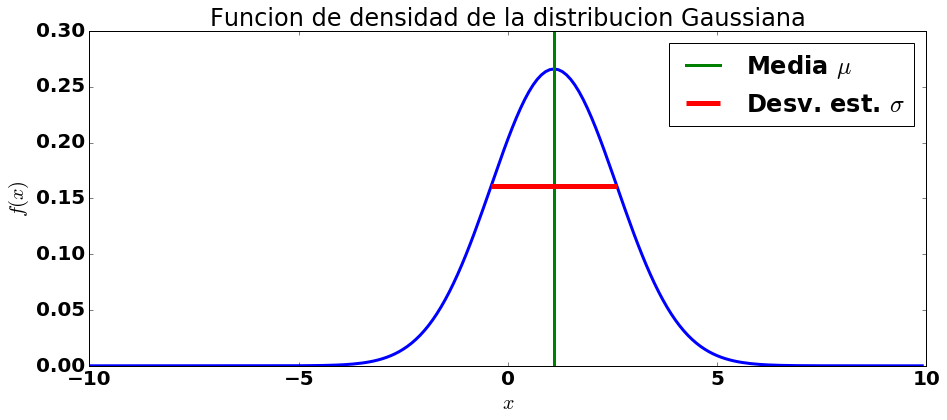

In [27]:
mu = 1.1 # media aritmética
sigma = 1.5 # desviación estándar


x = np.arange(-10,10,0.1)
f = (1./np.sqrt(2*np.pi*sigma**2))*np.exp(-(x-mu)**2/(2*sigma**2))

font = {'weight' : 'bold', 'size'   : 20}
matplotlib.rc('font', **font)

plt.figure(4)
plt.plot(x,f,linewidth=3)
plt.title('Funcion de densidad de la distribucion Gaussiana')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.axvline(mu, linewidth=3, c="green", label='Media $\mu$')
plt.plot([mu-sigma, mu+sigma], [1/(np.sqrt(np.e)*np.sqrt(2*np.pi*sigma**2)), 
                                1/(np.sqrt(np.e)*np.sqrt(2*np.pi*sigma**2))], linewidth=5, 
         linestyle="-", color="red", solid_capstyle="butt", label='Desv. est. $\sigma$')
plt.legend()

$\textbf{FIGURA 4.}$ Función de densidad de la distribución normal o Gaussiana.

Otras características importantes son su forma de campana, que tiene un solo máximo (unimodal), y se extiende asintóticamente con respecto al eje $x$ en ámbas direcciones.

$\textbf{Cómo identificar que es una distribución normal:}$

- Porque se dice explicitamente.
- Porque la variable es aleatoria y no se cumplen las hipótesis de otros modelos. Luego se supone normal.
- Porque el problema permite deducir que es normal.
- Porque la aplicación de un estimador lo verifica.

Miremos ahora los histogramas de los datos que se expusieron al principio:

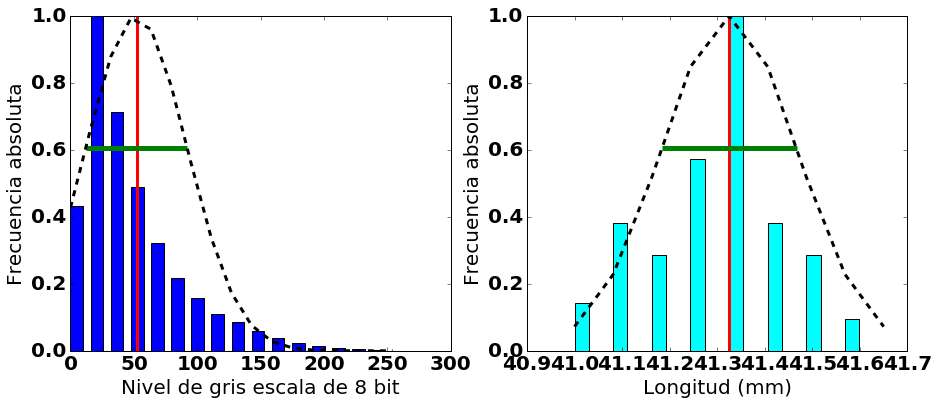

In [28]:
plt.figure(3)
# Patrón de speckle
plt.subplot(1,2,1)
plt.bar(bins[0:histS.size],histS/float(np.max(histS)),width=10)
plt.axvline(mediaS, linewidth=3, c="red")
plt.plot([mediaS-devstdS, mediaS+devstdS], [1/(np.sqrt(np.e)), 1/(np.sqrt(np.e))],
         linewidth=5, linestyle="-", color="green",solid_capstyle="butt")

fS = np.exp(-(bins-mediaS)**2/(2*devstdS**2))
plt.plot(bins, fS, 'k--', linewidth=3)

plt.xlabel('Nivel de gris escala de 8 bit')
plt.ylabel('Frecuencia absoluta')

# Medidas de longitud
plt.subplot(1,2,2)
plt.bar(binsL[0:histL.size],histL/float(np.max(histL)),width=0.03,color='cyan')
plt.axvline(mediaL,linewidth=3, c="red")
plt.plot([mediaL-devstdL, mediaL+devstdL], [1/(np.sqrt(np.e)), 1/(np.sqrt(np.e))],
         linewidth=5, linestyle="-", color="green", solid_capstyle="butt")

fL = np.exp(-(binsL-mediaL)**2/(2*devstdL**2))
plt.plot(binsL, fL, 'k--', linewidth=3)

plt.xlabel('Longitud (mm)')
plt.ylabel('Frecuencia absoluta')
plt.show()

$\textbf{FIGURA 5.}$ Histogramas (izquierda) intensidad patrón de speckle y (derecha) medidas de longitud de muestra. las barras rojas y verdes corresponden al promedio y desviación estándar respectivamente. Las líneas punteadas corresponden a la distribución normal con los parámetros promedio y desviación estándar de los dos grupos de datos.

Note como efectivamente para el caso del patrón de speckle la distribución normal no se ajusta. Para el caso de las longitudes medidas la distribución normal se ajusta mejor pero no de forma perfecta, lo que puede significar que son necesarios más datos. Más adelante miraremos un estimador que nos permite de manera cuantitativa decir que tanto se ajusta la distribución normal a los datos.

La $\textbf{función de distribución normal}$, útil para medir probabilidades, se define como:

$$F(X) = P(X<x) = \frac{1}{\sqrt{(2\pi\sigma^2)}} \int_{-\infty}^x \exp{\Big(\frac{-(x-\mu)^2}{2\sigma^2}\Big)} \text{d}x $$

Y nos indica cuál es la probabilidad de obtener un valor inferior a $x$.

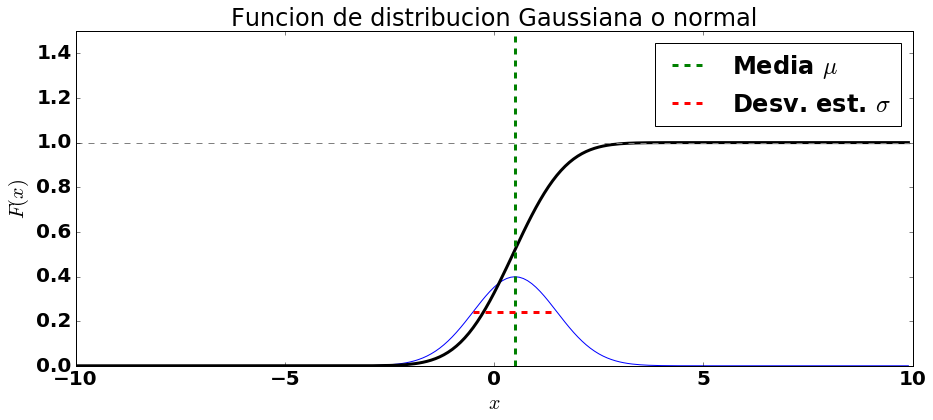

In [29]:
mu = 0.5 # media aritmética
sigma = 1.0 # desviación estándar
dx = 0.1 # muestreo

x = np.arange(-10,10,dx)
f = (1./np.sqrt(2*np.pi*sigma**2))*np.exp(-(x-mu)**2/(2*sigma**2))

f2 = np.zeros((x.size))
for cont in range(1,x.size):
    f2[cont] = f2[cont-1] + f[cont]

f2 = f2*dx


font = {'weight' : 'bold', 'size'   : 20}
matplotlib.rc('font', **font)

plt.figure(4)
plt.plot(x,f)
plt.plot(x,f2,color='k',linewidth=3)
plt.axhline(1,linewidth=1,linestyle='--', c="gray")
plt.title('Funcion de distribucion Gaussiana o normal')
plt.xlabel('$x$')
plt.ylabel('$F(x)$')
plt.ylim(0,1.5)
plt.axvline(mu,linestyle='--', linewidth=3, c="green", label='Media $\mu$')
plt.plot([mu-sigma, mu+sigma], [1/(np.sqrt(np.e)*np.sqrt(2*np.pi*sigma**2)), 
                                1/(np.sqrt(np.e)*np.sqrt(2*np.pi*sigma**2))], linewidth=3, 
         linestyle="--", color="red", solid_capstyle="butt", label='Desv. est. $\sigma$')
plt.legend()

$\textbf{FIGURA 6.}$ Función de distribución normal o Gaussiana (negra). La línea punteada azul corrresponde a la función de densidad.

Siguiendo el mismo razonamiento la probabilidad de obtener un valor entre $x_1$ y $x_2$ será:

$$P(x_1 < X < x_2) = \frac{1}{\sqrt{(2\pi\sigma^2)}} \int_{x_1}^{x_2} \exp{\Big(\frac{-(x-\mu)^2}{2\sigma^2}\Big)} \text{d}x $$

Cómo ejemplo calculemos tres probabilidades de las medidas de longitud: la probabilidad de que la siguiente medida sea menor que 41.6 mm $P(X<41.6)$, la probabilidad de que la siguiente medida esté entre 41.1 mm y 41.4 mm $P(41.1 < X < 41.4)$, y la probabilidad de que la siguiente medida sea mayor que 41.1 mm $P(X > 41.1)$.

In [30]:
x = np.arange(-5*devstdL+mediaL,5*devstdL+mediaL,dx)
f = (1./np.sqrt(2*np.pi*devstdL**2))*np.exp(-(x-mediaL)**2/(2*devstdL**2))

f2 = np.zeros((x.size))
for cont in range(1,x.size):
    f2[cont] = f2[cont-1] + f[cont]

f2 = f2*dx

P1 = f2[int((41.6-(-5*devstdL+mediaL))/dx)]
P2 = f2[int((41.4-(-5*devstdL+mediaL))/dx)] - f2[int((41.1-(-5*devstdL+mediaL))/dx)]
P3 = 1.0 - f2[int((41.1-(-5*devstdL+mediaL))/dx)]

print('La probabilidad de que la siguiente medida sea menor a 41.6 mm es de %.3f ' %(P1))
print('La probabilidad de que la siguiente medida esté entre 41.1 mm y 41.4 mm es de %.3f ' %(P2))
print('La probabilidad de que la siguiente medida sea mayor a 41.1 mm es de %.3f ' %(P3))

La probabilidad de que la siguiente medida sea menor a 41.6 mm es de 0.959 
La probabilidad de que la siguiente medida esté entre 41.1 mm y 41.4 mm es de 0.586 
La probabilidad de que la siguiente medida sea mayor a 41.1 mm es de 0.969 


NOTA: Investigar que es la distribución normal tipificada o estándar.

## Distribución de t-Student

Definición: Sean $X_1$, $X_2$, ..., $X_\nu$ y $X$, $\nu$ + 1 variables aleatorias normales con media 0 y desviación $\sigma$ independientes entre si, entonces la variable

$$t_\nu = \frac{X_i}{\sqrt{\frac{1}{\nu} \sum^\nu X_i^2}} $$

recibe el nombre de t de Student con $\nu$ grados de libertad.

Recordando que la variable Chi-cuadrado con $\nu$ grados de libertad se define como la suma de $\nu$ variables aleatorias con media 0 y varianza 1, $\chi^2 = X_1^2 + X_2^2 + ... + X_\nu^2$, la variable t-Student con $\nu$ grados de libertad se puede escribir como:
$$t_\nu = \frac{X_i/\sigma}{\sqrt{\frac{1}{\nu} \sum^\nu X_i^2/\sigma^2}} = \frac{Z_i}{\sqrt{\frac{1}{\nu} \chi_\nu^2}} $$
donde $Z_i = \frac{X_i - \mu}{\sigma}$ es la variable normal tipificada; en este caso con $\mu=0$. Recuerde que la normal tipificada tiene media cero y varianza uno.

La función de densidad asociada a la distribución t de Student es

$$f(t) = \frac{1}{\sqrt \nu \beta \big (\frac{1}{2},\frac{\nu}{2} \big )} \Big( 1+ \frac{t^2}{\nu} \Big)^{- \frac{\nu + 1}{2}} \ ; \ -\infty < t < \infty$$

donde $$\beta(p,q) = \frac{\Gamma(p)\Gamma(q)}{\Gamma(p+q)}$$

y $\Gamma$ es la función gamma.

La media y la varianza de la distribución t vienen dadas por $\mu = 0$ y $\sigma_t^2 = \frac{\nu}{\nu-2}$ para $\nu$ > 2. Note que esta distribución solo depende del parámetro $\nu$ y que a medida que este parámetro se hace grande su varianza tiende a la unidad, es decir, la distribución t-Student tiende a la distribución normal.

Comparemos ahora la distribución t-Student con la distribución normal.

[]

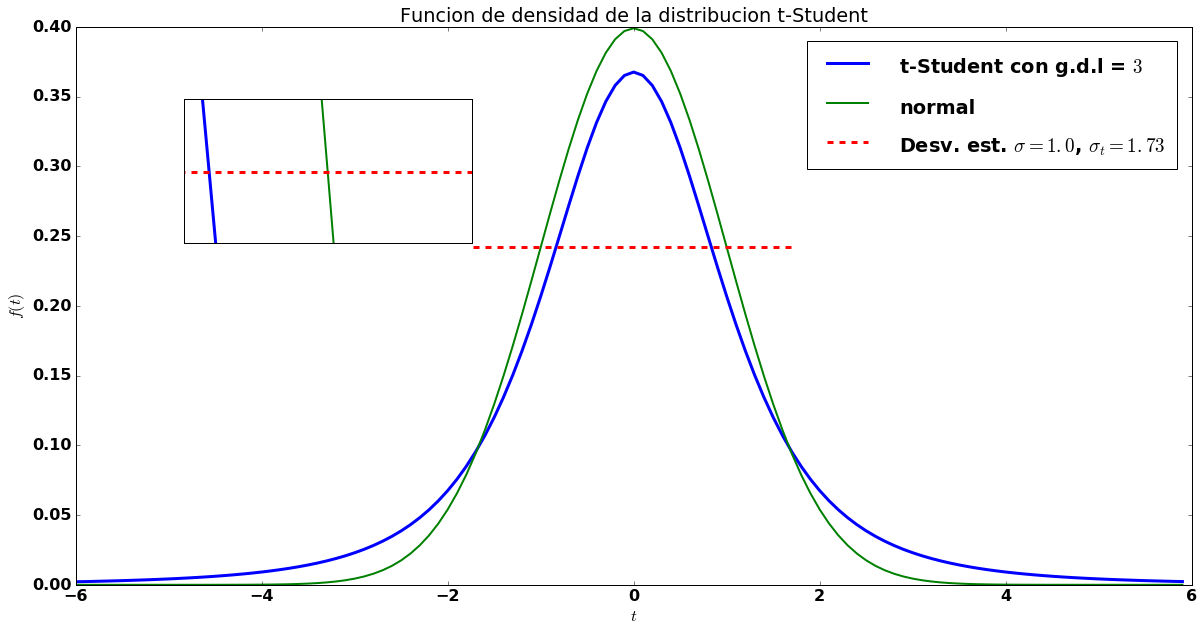

In [31]:
# Variar el parámetro n para ver la diferencia entre distribución normal y t-student
n = 3. # grados de libertad 
sigmat = np.sqrt(n/(n-2)) # Inverso Desviación estándar de t

t = np.arange(-6,6,0.1)
beta = (special.gamma(0.5)*special.gamma(n/2))/special.gamma(0.5+n/2)
ft = (1./(np.sqrt(n)*beta))*(1 + t**2/n)**(-(n+1)/2)


mu = 0. # media aritmética
sigma = 1. # desviación estándar
x = np.arange(-6,6,0.1)
f = (1./np.sqrt(2*np.pi*sigma**2))*np.exp(-(x-mu)**2/(2*sigma**2))

plt.rcParams['figure.figsize'] = 20, 10
font = {'weight' : 'bold', 'size'   : 24}
matplotlib.rc('font', **font)

plt.figure(4)
plt.plot(t,ft,linewidth=3,label='t-Student con g.d.l = $%d$' %n)
plt.plot(x,f,linewidth=2,label='normal')
plt.plot([mu-sigmat, mu+sigmat], [1/(np.sqrt(np.e)*np.sqrt(2*np.pi*sigma**2)), 
                                1/(np.sqrt(np.e)*np.sqrt(2*np.pi*sigma**2))], linewidth=3, 
         linestyle="--", color="red", solid_capstyle="butt", label='Desv. est. $\sigma = 1.0$, $\sigma_t = %.2f$' % sigmat)

plt.title('Funcion de densidad de la distribucion t-Student')
plt.xlabel('$t$')
plt.ylabel('$f(t)$')
plt.legend()

# Gráfica embebida
font = {'weight' : 'bold', 'size'   : 16}
matplotlib.rc('font', **font)
a = plt.axes([0.2, 0.6, .2, .2], axisbg='w')
plt.plot(t,ft,linewidth=3,label='t-Student con n=$%d$' %n)
plt.plot(x,f,linewidth=2,label='normal')
plt.plot([mu-sigmat, mu+sigmat], [1/(np.sqrt(np.e)*np.sqrt(2*np.pi*sigma**2)), 
                                1/(np.sqrt(np.e)*np.sqrt(2*np.pi*sigma**2))], linewidth=3, 
         linestyle="--", color="red", solid_capstyle="butt", label='Desv. est. $\sigma$')
plt.xlim(0.8,1.2)
plt.ylim(0.24,0.244)
plt.setp(a, xticks=[], yticks=[])

$\textbf{FIGURA 7.}$ Función de densidad de la distribución t-Student con n grados de libertad (azul). La línea verde corrresponde a la función de densidad de la distribución normal con media cero y desviación estándar uno.

Para determinar el estadístico t dado el valor de incerteza $\alpha$ y un tamaño de muestra n usamos la función stats.t.interval() de python. Por ejemplo si tenemos n=18 y una incerteza del 5%

In [32]:
alpha = 5.0 # porcentaje de incerteza
n = 18 # tamaño de la muestra
gdl = n - 1
confi = 1. - alpha*1e-2

aux = stats.t.interval(confi,gdl,loc=0,scale=1) # loc sirve para desplazar la distribución, scale para escalarla.
valor_t = aux[1]

print('El valor de t-Student \
para una incerteza de %.2f porciento y un tamaño de muestra n = %d es de %.4f' %(alpha,n,valor_t))

El valor de t-Student para una incerteza de 5.00 porciento y un tamaño de muestra n = 18 es de 2.1098


### Intervalo de confianza

En general, el valor de la desviación estándar y de la media aritmética de la población se desconocen. Para determinar un intervalo de confianza, a partir de los datos de una muestra, que nos permita asegurar que la media aritmética se encuentra dentro de dicho intervalo, debemos construir la expresión de la probabilidad usando la media aritmética y desviación estándar de la muestra bajo la premisa de que estas son muy cercanas a la de la población. Entonces para una incerteza $\alpha$ con una muestra $n \geq 30$ se tiene que la probabilidad está dada por:
$$P \bigg (\bar{X}-z_{\alpha/2}\frac{S}{\sqrt n} < \mu < \bar{X}+z_{\alpha/2}\frac{S}{\sqrt n} \bigg ) = 1 - \alpha$$

donde $\bar{X}$ es la media aritmética de la muestra, $S$ es la desviación estándar de la muestra, y $z_{\alpha/2}$ es el valor en la abscisa de la distribución normal estándar o tipificada.

Entonces diremos que el intervalo de confianza es:
$$I = \bigg [\bar{X} \pm z_{\alpha/2}\frac{S}{\sqrt n} \bigg ]$$

Cuando $n < 30$ la desviación estándar de las muestras puede variar considerablemente por lo que la expresión anterior no es válida. Recordando que la variable aleatoria normal tipificada de una muestra de n elementos se escribe como $Z = \frac{X - \mu}{\sigma}$ (tendiendo a una distribución normal estándar cuando n tiende a infinito), con $\mu$ y $\sigma$ la media y la desviación estándar de la población respectivamente; como la información de la población se desconoce se escribe la variable en términos de la varianza de la muestra:
$$T = \frac{\bar{X} - \mu}{S/\sqrt n}$$
No lo haremos aquí, pero al dividir y multiplicar por la desviación estándar de la población se puede demostrar que esta variable sigue la distribución t-Student para $\nu$ = n-1 grados de libertad (Mirar libro de Garcia para la demostración). Y por lo tanto podemos expresar la probabilidad como:
$$P \bigg (-t_{\alpha/2,\nu} < T < t_{\alpha/2,\nu} \bigg ) = 1 - \alpha$$
reemplazando y reorganizando obtenemos:
$$P \bigg (\bar{X}-t_{\alpha/2,\nu}\frac{S}{\sqrt n} < \mu < \bar{X}+t_{\alpha/2,\nu}\frac{S}{\sqrt n} \bigg ) = 1 - \alpha$$

y por lo tanto diremos que el intervalo de confianza es:
$$I = \bigg [\bar{X} \pm t_{\alpha/2,\nu}\frac{S}{\sqrt n} \bigg ]$$

Lo anteriormente derivado se obtiene a partir de la definición de varianza muestral:
$$S^2 = \frac{1}{n-1} \sum^n (x_i - \bar x)^2$$

Por lo que $\sigma_m = \frac{S}{\sqrt n}$. 


Nota: La razón para que la varianza muestral esté multiplicada por el inverso de $(n-1)$ y no por $n$ es para no subestimar el valor de la varianza poblacional. Más información al respecto se puede encontrar en el libro de Garcia, 9.3.1, o del texto "Manual de laboratorio" del profesor Jorge Mahecha.

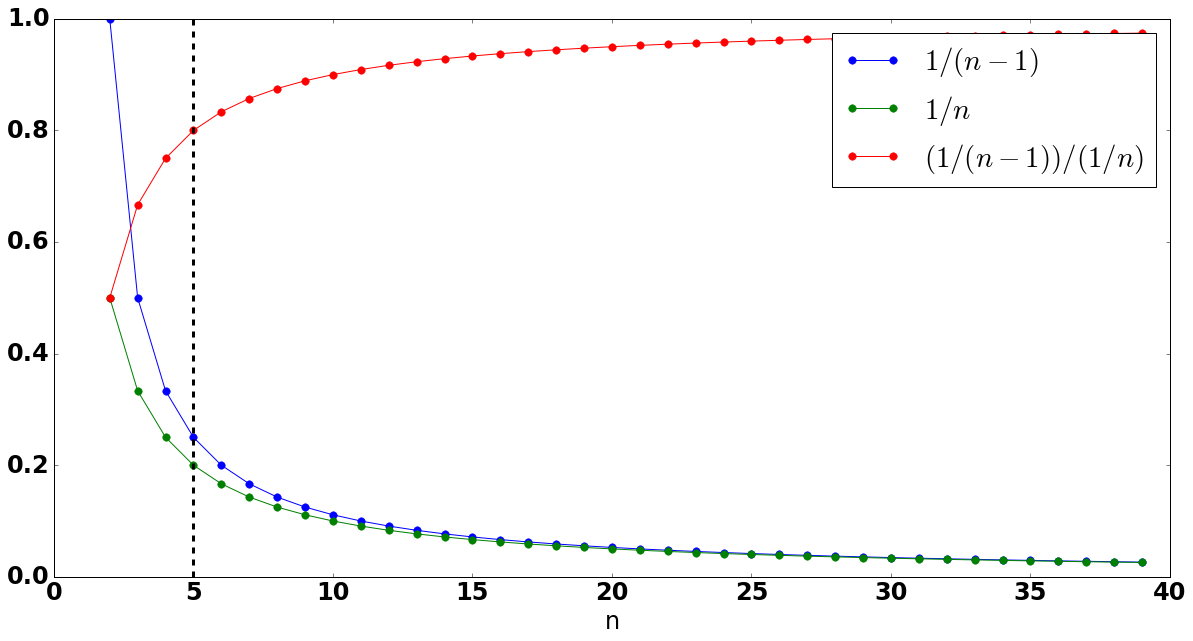

In [33]:
n = np.arange(2,40)
nS1 = (1./(n-1))
nS2 = (1./n)
razon = nS2/nS1

plt.rcParams['figure.figsize'] = 20, 10
font = {'weight' : 'bold', 'size'   : 24}
matplotlib.rc('font', **font)
plt.figure()
plt.plot(n,nS1,marker='.',ms=15,label='$1/(n-1)$')
plt.plot(n,nS2,marker='.',ms=15,label='$1/n$')
plt.plot(n,razon,marker='.',ms=15,label='$(1/(n-1))/(1/n)$')
plt.axvline(5,linestyle='--', linewidth=3, c="black")
plt.xlabel('n')
plt.legend()

$\textbf{Figura 8.}$ Comportamiento de los factores que acompañan la desviación estándar de la muestra para la determinación de la desviación estándar de la media. n es el número de datos tomados en la muestra.

$\textbf{Ejemplo: aceleración de la gravedad.}$
Se lanza una moneda de 200 pesos desde una altura de 125 cm.

La ecuación básica es $$ d=\frac{1}{2}gt^2$$, es decir, $g = \frac{2d}{t^2}$

A continuación tomaremos los datos del tiempo de caida y con ellos calcularemos el promedio y la desviación estándar de la muestra:

In [34]:
#datos experimentales
incerteza = 0.01
acelT = 977. # aceleración teórica en Medellín cm/s^2
dist = 125. # altura en cm
datos = np.array([0.51,0.48,0.43,0.44,0.43]) # tiempo en segundos
acel = 2*dist/datos**2 # Aceleraciones experimentales

aux = stats.t.interval(1-incerteza,5-1,loc=0,scale=1)
valor_t = aux[1] # corrección de t-student
acelP = np.mean(acel) # Aceleración promedio
acelSTD = np.sqrt(np.var(acel,ddof=1)) # Desv estándar de la muestra
error = valor_t*acelSTD/np.sqrt(datos.size)

print('La aceleración de la gravedad teórica es %.f cm/s^2' %acelT)
print('La aceleración experimental con una incerteza del %.2f porciento es %.f +/- %.f en cm/s^2' % (incerteza*100,acelP,error))
print('Es decir, en el intervalo (%.f , %.f) cm/s^2' % (acelP-error,acelP+error))
print('valor t = %.4f ' %valor_t)

La aceleración de la gravedad teórica es 977 cm/s^2
La aceleración experimental con una incerteza del 1.00 porciento es 1208 +/- 363 en cm/s^2
Es decir, en el intervalo (845 , 1572) cm/s^2
valor t = 4.6041 


En el caso de haber considerado una distribución gaussiana obtendríamos


In [35]:
# tres sigma
error3s =  3.0*acelSTD/np.sqrt(datos.size)
print('El error considerando 3 sigma está en el intervalo (%.f , %.f) cm/s^2' % (acelP-error3s,acelP+error3s))

El error considerando 3 sigma está en el intervalo (972 , 1445) cm/s^2


NOTA: ¿están escritos correctamente los resultados?